# Plotting for hollow core fiber at resonance notes


In [160]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from scipy.optimize import newton
%matplotlib widget


In [161]:
max_loss_wl = 6.90764472e-06

A = SlabExact(scale=1e-5, Ts=[5, 1, 5, 1, 5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[300, 500, 800, 500, 300],
              symmetric=True, wl=max_loss_wl)

In [162]:
b = 1.25

def quadratic_piecewise(x):
    conds = [(x<-b), ((-b<=x)*(x<=b)), (x>b)]
    funcs = [0, lambda x: 1 - (x / b) ** 2, 0]
    return np.piecewise(x, conds, funcs)

f0 = quadratic_piecewise

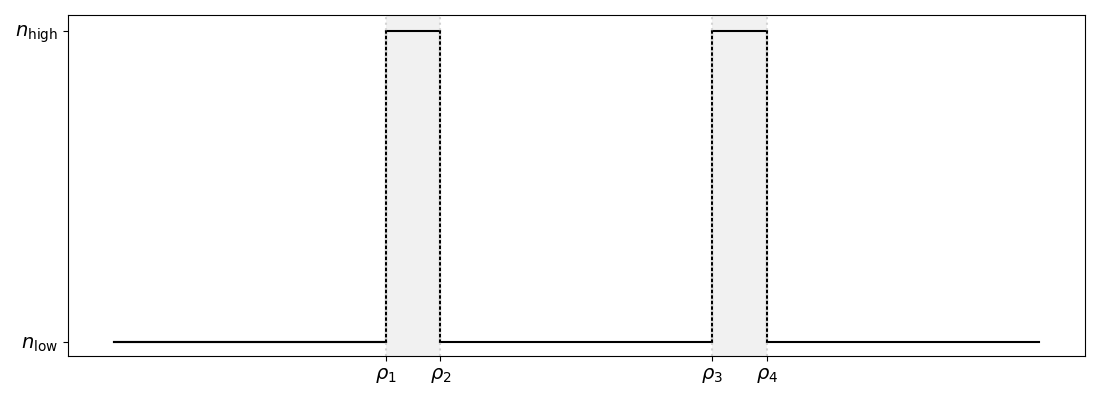

In [163]:
fig1, ax = A.plot_refractive_index(plot_regions=True, hatch=None, color='k', linewidth=1.5)
ax.set_yticks([A.ns[0], A.ns[1]], labels=['$n_{\\text{low}}$', '$n_{\\text{high}}$'], fontsize=14)
ax.set_xticks(list(A.Rhos[1:-1]), labels=['$\\rho_{%i}$'%i for i in range(1, len(A.Rhos)-1)], fontsize=14)
ax.set_ylim(.98)
plt.tight_layout()
# A.add_1d_plot(f0)

In [164]:
fig1.savefig('rip.jpg', dpi=600)

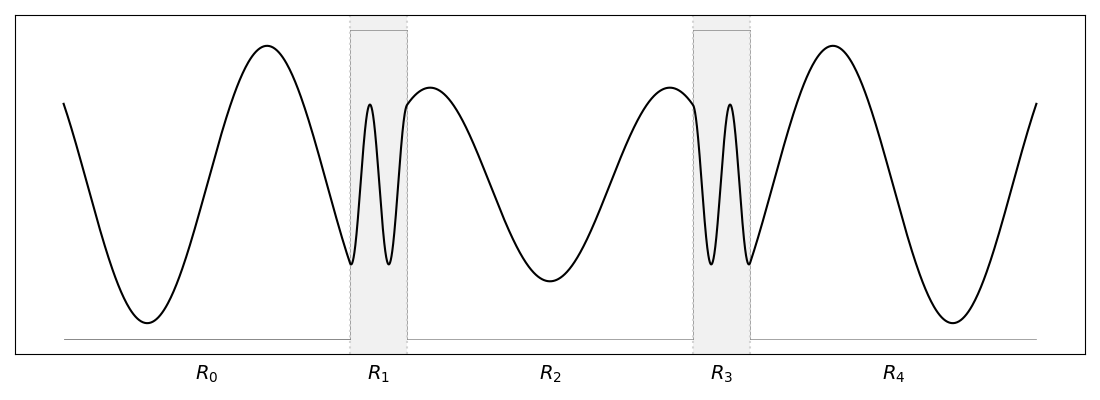

In [165]:
Z = 1.5
FZ = A.fields_Z(Z, mode_type='radiation')
fheight = np.ptp(FZ(A.all_Xs))
FZ_scaled = lambda x: .9*(-A.n_low + A.n_high)/(fheight) * FZ(x) + (A.n_low + A.n_high)/2

fig2, ax = A.plot_refractive_index(plot_regions=True, hatch=None, color='gray', linewidth=.5)
A.add_1d_plot(FZ_scaled, color='k', linewidth=1.5)
ax.set_yticks([])
ax.set_xticks(list(1/2 *(A.Rhos[1:]+A.Rhos[:-1])), labels=['$R_{%i}$'%i for i in range(len(A.Rhos)-1)], fontsize=14)
ax.xaxis.set_tick_params(width=0)
plt.tight_layout()


In [166]:
fig2.savefig('radmode.jpg', dpi=600)

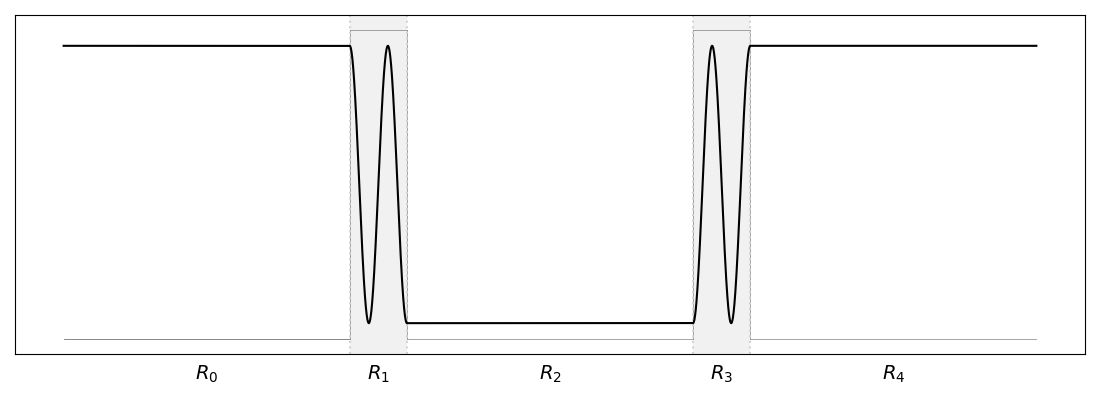

In [167]:
Z = 1e-6
FZ = A.fields_Z(Z, mode_type='radiation')
fheight = np.ptp(FZ(A.all_Xs))
FZ_scaled = lambda x: .9*(-A.n_low + A.n_high)/(fheight) * FZ(x) + (A.n_low + A.n_high)/2

fig3, ax = A.plot_refractive_index(plot_regions=True, hatch=None, color='gray', linewidth=.5)
A.add_1d_plot(FZ_scaled, color='k', linewidth=1.5)
ax.set_yticks([])
ax.set_xticks(list(1/2 *(A.Rhos[1:]+A.Rhos[:-1])), labels=['$R_{%i}$'%i for i in range(len(A.Rhos)-1)], fontsize=14)
ax.xaxis.set_tick_params(width=0)
plt.tight_layout()


In [168]:
fig3.savefig('resmode.jpg', dpi=600)

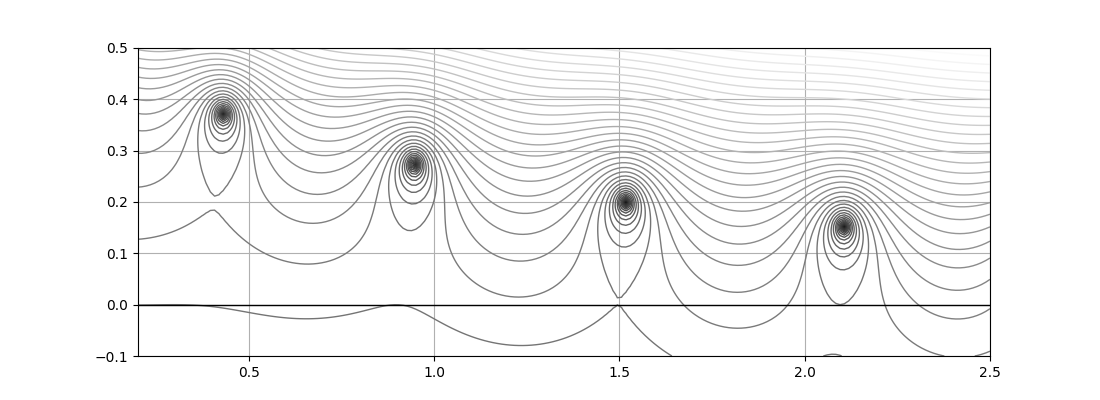

In [169]:
fig4, ax = A.deteriminant_plot(.2, 2.5,-.1,.5, plot_sdp=False, levels=50, iref=200, rref=200, facecolor='w', cmap='gray', linewidths=1,
                   grid=True, plot_x_axis=True, axis_linecolor='k', colorbar=False, figsize=(11,4));

In [170]:
fig4.savefig('detplotres.jpg', dpi=600)

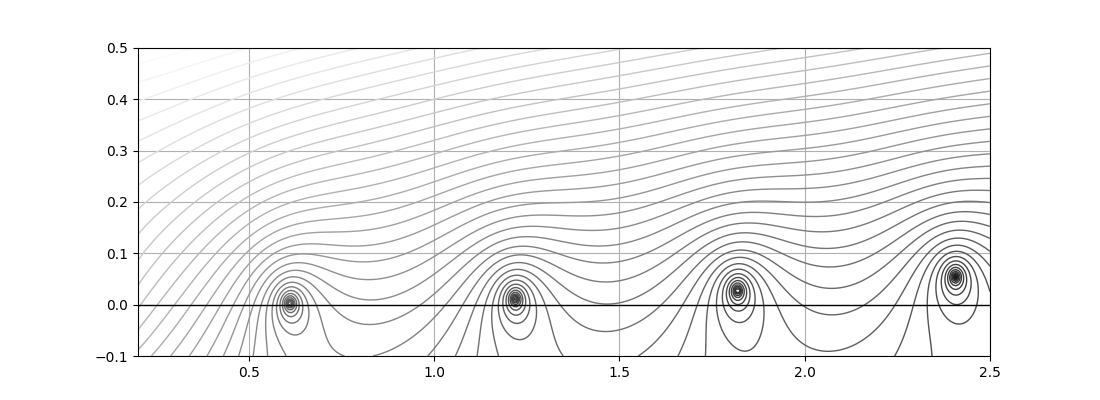

In [171]:
A.wl=7.8e-6

fig5, ax = A.deteriminant_plot(.2, 2.5,-.1,.5, plot_sdp=False, levels=50, iref=300, rref=300, facecolor='w', cmap='gray', linewidths=1,
                   grid=True, plot_x_axis=True, axis_linecolor='k', colorbar=False, figsize=(11,4));
A.wl=max_loss_wl


In [172]:
fig5.savefig('detplottyp.jpg', dpi=600)


In [173]:
A.wl=7.8e-6


In [174]:
Z_lows[2:].real

array([ 4.37740762,  9.39409007, 13.30696689])

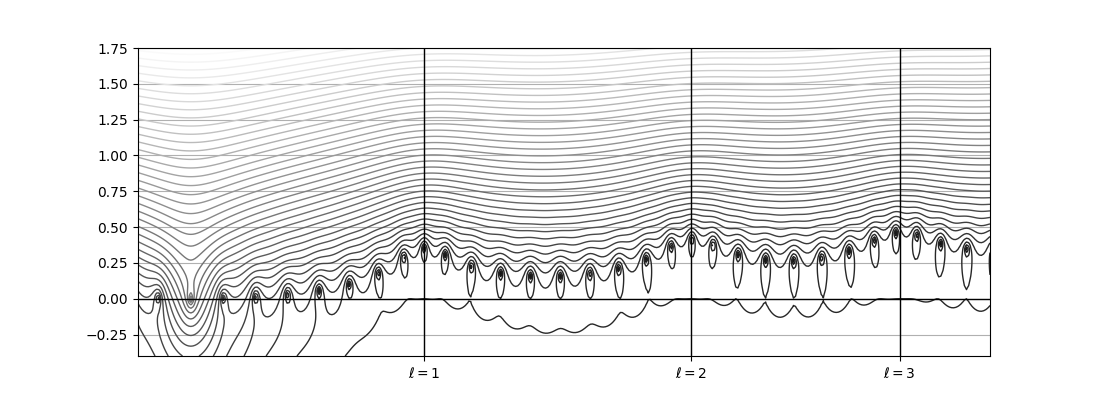

In [175]:
A.wl=7.8e-6

Z_lows = np.sqrt(np.array([(l * np.pi/A.Ts[1])**2 - (2*np.pi/(A.wl/A.scale))**2 * (A.n_high**2 - A.n_low**2) for l in range(1, 6)]), dtype=complex)


fig6, ax = A.deteriminant_plot(-1, 15, -.4, 1.75, plot_sdp=False, levels=50, iref=800, rref=400, facecolor='w', cmap='gray', linewidths=1,
                   grid=True, plot_x_axis=True, axis_linecolor='k', colorbar=False, figsize=(11,4));
A.wl=max_loss_wl
ax.axvline(Z_lows[2].real, linewidth=1, color='k')
ax.axvline(Z_lows[3].real, linewidth=1, color='k')
ax.axvline(Z_lows[4].real, linewidth=1, color='k')
ax.set_xticks(Z_lows[2:].real, labels=['$\ell = 1$', '$\ell = 2$', '$\ell = 3$'])

In [118]:
A.wl=7.8e-6
Z_leaky = newton(A.determinant_Z, np.array(Z_lows[2]+.3j), args=('TE', 'leaky'))
F_leaky = A.fields_Z(Z_leaky, mode_type='leaky')
A.wl=max_loss_wl

plt.plot(Z_leaky.real, Z_leaky.imag, marker='o')
Z_leaky, Z_lows[2]

((4.381516158023664+0.35129689800999025j), (4.377407615648979+0j))

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

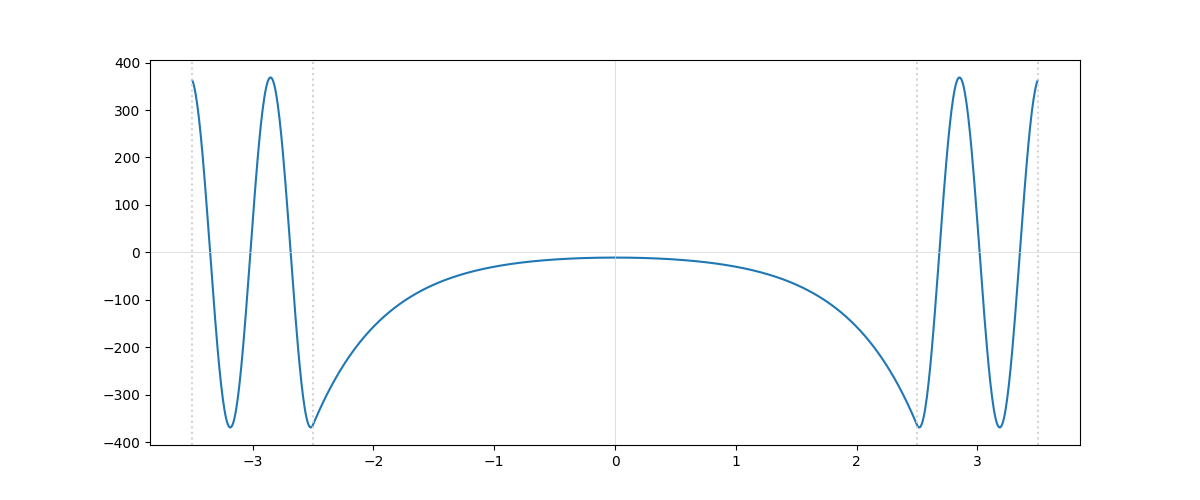

In [101]:
A.plot_field_1d(F_leaky, xs=np.linspace(A.Rhos[1], A.Rhos[-2], 1000))

In [159]:
# A.wl=7.8e-6
# fig6, ax = A.deteriminant_plot(-.1, .1, 5, 6, plot_sdp=False, levels=50, iref=800, rref=400, facecolor='w', cmap='gray', linewidths=1,
#                    grid=True, plot_y_axis=True, axis_linecolor='k', colorbar=True, figsize=(11,4));
# A.wl=max_loss_wl
# plt.plot(Z_lows[1].real, Z_lows[1].imag, marker='o')
